In [1]:
import pandas as pd
df = pd.read_csv('movies.csv')
print(df)
print(df.columns)

      movieId                               title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3878     3948             Meet the Parents (2000)   
3879     3949          Requiem for a Dream (2000)   
3880     3950                    Tigerland (2000)   
3881     3951             Two Family House (2000)   
3882     3952               Contender, The (2000)   

                            genres  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  
3                     Comedy|Drama  
4                           Comedy  
...                            ...  
3878                        Comedy  
3879                         Drama  
3880                         D

In [2]:
df_1 = pd.read_csv('ratings.csv')
print(df_1)
print(df_1.columns)

        userId  movieId  rating  timestamp
0            1     1193       5  978300760
1            1      661       3  978302109
2            1      914       3  978301968
3            1     3408       4  978300275
4            1     2355       5  978824291
...        ...      ...     ...        ...
101665     677     3803       4  975611622
101666     677     1124       3  975609833
101667     677     2872       5  975611057
101668     677      602       5  975611953
101669     677     3678       5    9756110

[101670 rows x 4 columns]
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [4]:
df_2 = pd.read_csv('users.csv')
print(df_2)
print(df_2.columns)

      userId gender  age  occupation    zip
0          1      F    1          10  48067
1          2      M   56          16  70072
2          3      M   25          15  55117
3          4      M   45           7  02460
4          5      M   25          20  55455
...      ...    ...  ...         ...    ...
6035    6036      F   25          15  32603
6036    6037      F   45           1  76006
6037    6038      F   56           1  14706
6038    6039      F   45           0  01060
6039    6040      M   25           6  11106

[6040 rows x 5 columns]
Index(['userId', 'gender', 'age', 'occupation', 'zip'], dtype='object')


In [5]:
print(df.isnull().sum())
print(df_1.isnull().sum())
print(df_2.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
userId        0
gender        0
age           0
occupation    0
zip           0
dtype: int64


In [6]:
print(df.duplicated().sum())
print(df_1.duplicated().sum())
print(df_2.duplicated().sum())

0
0
0


In [7]:
# Convert timestamp to datetime format
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'], unit='s')

# Check the updated format
print(df_1[['timestamp']].head())

            timestamp
0 2000-12-31 22:12:40
1 2000-12-31 22:35:09
2 2000-12-31 22:32:48
3 2000-12-31 22:04:35
4 2001-01-06 23:38:11


In [8]:
# Merge ratings with movies using movieId
ratings_movies = pd.merge(df_1, df, on='movieId')

# Display merged data
print(ratings_movies.head())

   userId  movieId  rating           timestamp  \
0       1     1193       5 2000-12-31 22:12:40   
1       1      661       3 2000-12-31 22:35:09   
2       1      914       3 2000-12-31 22:32:48   
3       1     3408       4 2000-12-31 22:04:35   
4       1     2355       5 2001-01-06 23:38:11   

                                    title                        genres  
0  One Flew Over the Cuckoo's Nest (1975)                         Drama  
1        James and the Giant Peach (1996)  Animation|Children's|Musical  
2                     My Fair Lady (1964)               Musical|Romance  
3                  Erin Brockovich (2000)                         Drama  
4                    Bug's Life, A (1998)   Animation|Children's|Comedy  


In [9]:
# Merge the result with users using userId
full_data = pd.merge(ratings_movies, df_2, on='userId')

# Display final merged data
print(full_data.head())

   userId  movieId  rating           timestamp  \
0       1     1193       5 2000-12-31 22:12:40   
1       1      661       3 2000-12-31 22:35:09   
2       1      914       3 2000-12-31 22:32:48   
3       1     3408       4 2000-12-31 22:04:35   
4       1     2355       5 2001-01-06 23:38:11   

                                    title                        genres  \
0  One Flew Over the Cuckoo's Nest (1975)                         Drama   
1        James and the Giant Peach (1996)  Animation|Children's|Musical   
2                     My Fair Lady (1964)               Musical|Romance   
3                  Erin Brockovich (2000)                         Drama   
4                    Bug's Life, A (1998)   Animation|Children's|Comedy   

  gender  age  occupation    zip  
0      F    1          10  48067  
1      F    1          10  48067  
2      F    1          10  48067  
3      F    1          10  48067  
4      F    1          10  48067  


In [10]:
# Extract year from the title
full_data['year'] = full_data['title'].str.extract(r'\((\d{4})\)', expand=False)

# Remove the year from the title
full_data['title'] = full_data['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

print(full_data[['title', 'year']].head())

                             title  year
0  One Flew Over the Cuckoo's Nest  1975
1        James and the Giant Peach  1996
2                     My Fair Lady  1964
3                  Erin Brockovich  2000
4                    Bug's Life, A  1998


In [11]:
# Split genres into separate columns
full_data['genres'] = full_data['genres'].str.split('|')

# Example: Expand genres into individual columns (optional)
genres_expanded = full_data.explode('genres')

print(genres_expanded[['title', 'genres']].head())

                             title      genres
0  One Flew Over the Cuckoo's Nest       Drama
1        James and the Giant Peach   Animation
1        James and the Giant Peach  Children's
1        James and the Giant Peach     Musical
2                     My Fair Lady     Musical


In [12]:
pip install pyspark

In [13]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName('MovieRecommendationSystem').getOrCreate()

# Load the merged dataset into Spark DataFrame
data = spark.createDataFrame(full_data)
data.show(5)

+------+-------+------+-------------------+--------------------+--------------------+------+---+----------+-----+----+
|userId|movieId|rating|          timestamp|               title|              genres|gender|age|occupation|  zip|year|
+------+-------+------+-------------------+--------------------+--------------------+------+---+----------+-----+----+
|     1|   1193|     5|2000-12-31 22:12:40|One Flew Over the...|             [Drama]|     F|  1|        10|48067|1975|
|     1|    661|     3|2000-12-31 22:35:09|James and the Gia...|[Animation, Child...|     F|  1|        10|48067|1996|
|     1|    914|     3|2000-12-31 22:32:48|        My Fair Lady|  [Musical, Romance]|     F|  1|        10|48067|1964|
|     1|   3408|     4|2000-12-31 22:04:35|     Erin Brockovich|             [Drama]|     F|  1|        10|48067|2000|
|     1|   2355|     5|2001-01-06 23:38:11|       Bug's Life, A|[Animation, Child...|     F|  1|        10|48067|1998|
+------+-------+------+-------------------+-----

In [14]:
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator

# Convert userId and movieId to integer (required by ALS)
data = data.withColumn("userId", data["userId"].cast("integer"))
data = data.withColumn("movieId", data["movieId"].cast("integer"))
data = data.withColumn("rating", data["rating"].cast("float"))

# Split data into training and test sets
(training, test) = data.randomSplit([0.8, 0.2])

In [15]:
# Initialize the ALS model
als = ALS(
    maxIter=10,
    regParam=0.1,
    userCol="userId",
    itemCol="movieId",
    ratingCol="rating",
    coldStartStrategy="drop"  # To handle NaN predictions
)

# Fit the model
model = als.fit(training)

In [16]:
# Generate predictions
predictions = model.transform(test)

# Evaluate the model using RMSE
evaluator = RegressionEvaluator(
    metricName="rmse",
    labelCol="rating",
    predictionCol="prediction"
)
rmse = evaluator.evaluate(predictions)
print(f"Root-Mean-Square Error (RMSE): {rmse}")

Root-Mean-Square Error (RMSE): 0.9137278530863114


In [17]:
# Recommend top 5 movies for userId 1
user_id = 1
user_recommendations = model.recommendForAllUsers(5)
user_recommendations.filter(user_recommendations.userId == user_id).show(truncate=False)

+------+-----------------------------------------------------------------------------------------+
|userId|recommendations                                                                          |
+------+-----------------------------------------------------------------------------------------+
|1     |[{2927, 4.8908057}, {953, 4.838025}, {2071, 4.8207}, {3801, 4.789807}, {2360, 4.7107377}]|
+------+-----------------------------------------------------------------------------------------+



In [18]:
# Recommend top 5 users for a specific movieId (e.g., 50)
movie_recommendations = model.recommendForAllItems(5)
movie_recommendations.filter(movie_recommendations.movieId == 50).show(truncate=False)

+-------+---------------------------------------------------------------------------------------+
|movieId|recommendations                                                                        |
+-------+---------------------------------------------------------------------------------------+
|50     |[{567, 5.536049}, {597, 5.5198693}, {283, 5.4525065}, {53, 5.431159}, {577, 5.3709292}]|
+-------+---------------------------------------------------------------------------------------+



In [19]:
import requests

# Define your API key
api_key = '9cd5eafaa91194729132faea6f3495a9'
base_url = 'https://api.themoviedb.org/3/movie/'

# Function to get movie details
def get_movie_details(movie_id):
    url = f'{base_url}{movie_id}?api_key={api_key}'
    response = requests.get(url)
    movie_details = response.json()
    return movie_details

# Example usage
movie_id = 550  # Example movie ID (Fight Club)
movie_details = get_movie_details(movie_id)
print(movie_details)

{'adult': False, 'backdrop_path': '/hZkgoQYus5vegHoetLkCJzb17zJ.jpg', 'belongs_to_collection': None, 'budget': 63000000, 'genres': [{'id': 18, 'name': 'Drama'}], 'homepage': 'http://www.foxmovies.com/movies/fight-club', 'id': 550, 'imdb_id': 'tt0137523', 'origin_country': ['US'], 'original_language': 'en', 'original_title': 'Fight Club', 'overview': 'A ticking-time-bomb insomniac and a slippery soap salesman channel primal male aggression into a shocking new form of therapy. Their concept catches on, with underground "fight clubs" forming in every town, until an eccentric gets in the way and ignites an out-of-control spiral toward oblivion.', 'popularity': 111.249, 'poster_path': '/pB8BM7pdSp6B6Ih7QZ4DrQ3PmJK.jpg', 'production_companies': [{'id': 711, 'logo_path': '/tEiIH5QesdheJmDAqQwvtN60727.png', 'name': 'Fox 2000 Pictures', 'origin_country': 'US'}, {'id': 508, 'logo_path': '/7cxRWzi4LsVm4Utfpr1hfARNurT.png', 'name': 'Regency Enterprises', 'origin_country': 'US'}, {'id': 4700, 'logo

In [20]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505172 sha256=a64b8f2361a1f56133b61244b393f8c4231ccff03ed76489e75b57364cecdb44
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [21]:
from surprise import SVD, Reader, Dataset
from surprise.model_selection import train_test_split

# Load ratings data
df_1 = pd.read_csv('ratings.csv')

# Define the format for Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_1[['userId', 'movieId', 'rating']], reader)

# Split the data for training and testing
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize the model (using SVD algorithm)
model = SVD()
model.fit(trainset)

# Test the model
predictions = model.test(testset)

# You can make predictions for a specific user and movie like this:
user_id = 1  # Example userId
movie_id = 550  # Example movieId (Fight Club)
prediction = model.predict(user_id, movie_id)
print(f'Predicted Rating: {prediction.est}')

Predicted Rating: 3.22667704315251


In [22]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Example movies data (simplified)
df = pd.read_csv('movies.csv')

# Using the 'genres' column for content-based filtering
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['genres'])

# Calculate cosine similarity between movies
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get the most similar movies
def get_similar_movies(movie_id, cosine_sim=cosine_sim):
    idx = df.index[df['movieId'] == movie_id].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

# Example usage:
movie_id = 550  # Movie ID (Fight Club)
similar_movies = get_similar_movies(movie_id)
print(similar_movies)


6                          Sabrina (1995)
38                        Clueless (1995)
63                   Two if by Sea (1996)
67     French Twist (Gazon maudit) (1995)
91             Vampire in Brooklyn (1995)
116                   If Lucy Fell (1996)
120                      Boomerang (1992)
127                 Pie in the Sky (1995)
233                    French Kiss (1995)
234                   Forget Paris (1995)
Name: title, dtype: object


In [23]:
from surprise import accuracy

# Calculate RMSE for the predictions made by the collaborative filtering model
rmse = accuracy.rmse(predictions)
print(f'Root Mean Squared Error (RMSE): {rmse}')

RMSE: 0.8782
Root Mean Squared Error (RMSE): 0.878236021873494


In [24]:
# Define the threshold for liked movies (e.g., rating >= 4)
threshold = 4

# Filter the ratings to get movies the user has liked
# Use df_1 (ratings DataFrame) instead of df_2 (users DataFrame)
true_likes = df_1[df_1['rating'] >= threshold]['movieId'].tolist()

# Now, 'true_likes' contains the list of movie IDs that the user liked

In [25]:
# Assuming `get_similar_movies` is a function that returns the top N recommended movies.
def get_similar_movies(user_id, top_n=10):
    # Here, the recommendation system logic should fetch top N recommended movie IDs for the user.
    # For example, if you're using collaborative filtering, get the top N predicted movies:
    recommended_movies = []  # Replace with logic to fetch top N recommendations for `user_id`
    return recommended_movies

# Define true likes for evaluation (e.g., movies the user actually liked)
true_likes = [1, 2, 3, 4, 5]  # Example: the list of movie IDs that the user liked

# Get recommended movies (replace with your recommendation logic)
recommended_movies = get_similar_movies(user_id=1)

# Now you can calculate precision and recall
from sklearn.metrics import precision_score, recall_score

# Precision and recall require binary values: 1 for liked and 0 for not liked
# For simplicity, let's say we compare true likes vs recommended movies:
y_true = [1 if movie in true_likes else 0 for movie in recommended_movies]
y_pred = [1] * len(recommended_movies)  # We're assuming all recommended movies are "liked"

# Calculate precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
# Assuming `get_similar_movies` is a function that returns the top N recommended movies.
def get_similar_movies(user_id, top_n=10):
    # Here, the recommendation system logic should fetch top N recommended movie IDs for the user.
    # For example, if you're using collaborative filtering, get the top N predicted movies:
    # Replace with logic to fetch top N recommendations for `user_id`

    # Placeholder for recommendation logic, returning some movie IDs for demonstration
    recommended_movies = [1, 6, 7, 8, 9]
    return recommended_movies

# Define true likes for evaluation (e.g., movies the user actually liked)
true_likes = [1, 2, 3, 4, 5]  # Example: the list of movie IDs that the user liked

# Get recommended movies (replace with your recommendation logic)
recommended_movies = get_similar_movies(user_id=1)

# Now you can calculate precision and recall
from sklearn.metrics import precision_score, recall_score

# Precision and recall require binary values: 1 for liked and 0 for not liked
# For simplicity, let's say we compare true likes vs recommended movies:
y_true = [1 if movie in true_likes else 0 for movie in recommended_movies]
y_pred = [1] * len(recommended_movies)  # We're assuming all recommended movies are "liked"

# Calculate precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')

#Example: Calculate Precision and Recall for top N recommendations
top_n = 10
# Assuming `true_likes` is the list of movies the user liked
# and `recommended_movies` is the top N recommended movies.
# Convert lists to NumPy arrays or lists for precision/recall calculation
true_likes_arr = true_likes # No change if it's already a list
recommended_movies_arr = recommended_movies # No change if it's already a list

# Change 'average' to 'micro' to handle multiclass data
precision = precision_score(true_likes_arr, recommended_movies_arr, average='micro')
recall = recall_score(true_likes_arr, recommended_movies_arr, average='micro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.2
Recall: 1.0
Precision: 0.2
Recall: 0.2


In [27]:
from flask import Flask, jsonify, request
app = Flask(__name__)

@app.route('/recommend', methods=['GET'])
def recommend():
    user_id = request.args.get('user_id')
    # Get recommendations based on user_id
    recommendations = get_recommendations(user_id)  # Your recommendation logic
    return jsonify(recommendations)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


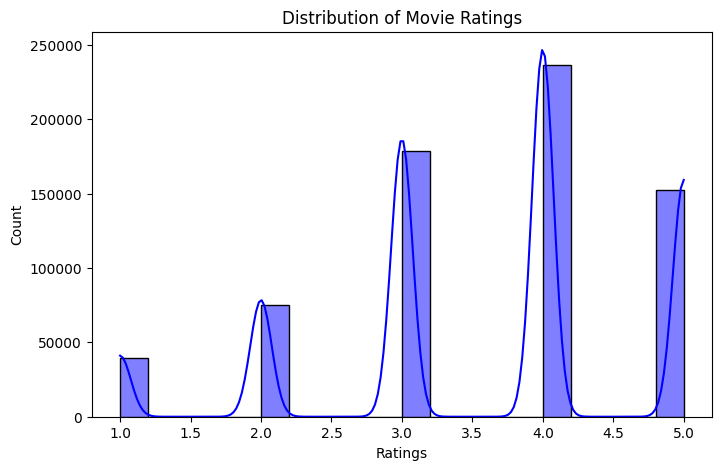

In [29]:
#Movie Ratings Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_1['rating'], bins=20, kde=True, color='blue')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()

<ipython-input-30-06b3fd2c8f03>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='title', data=top_movies, palette='viridis')


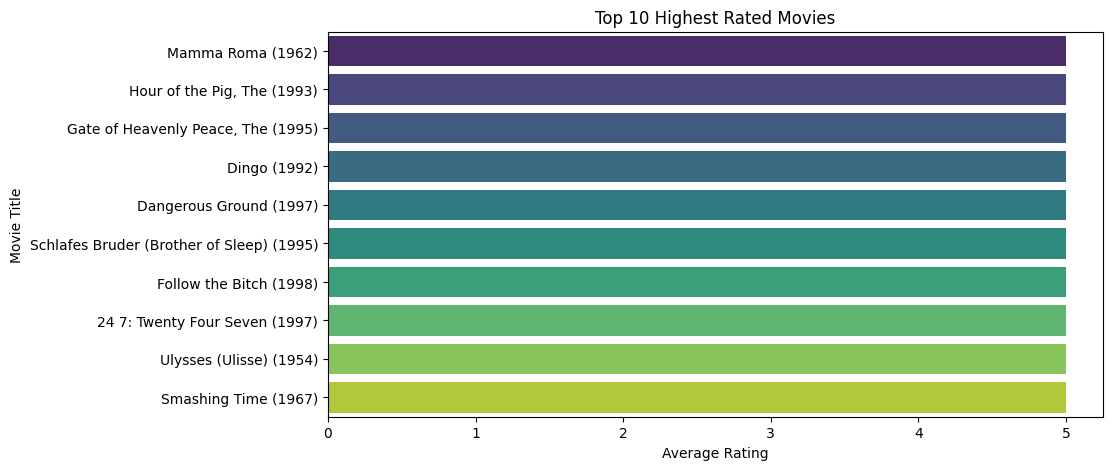

In [30]:
#Top 10 Highest Rated Movies
top_movies = df_1.groupby('movieId')['rating'].mean().nlargest(10).reset_index()
top_movies = top_movies.merge(df[['movieId', 'title']], on='movieId')

plt.figure(figsize=(10, 5))
sns.barplot(x='rating', y='title', data=top_movies, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest Rated Movies')
plt.show()

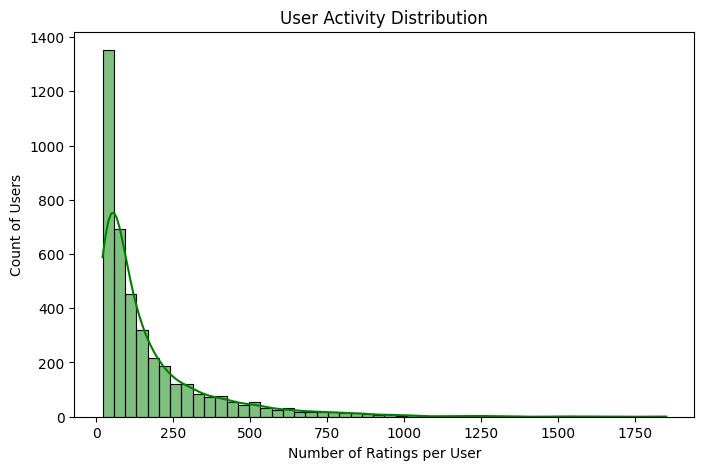

In [31]:
#User Activity Analysis
user_activity = df_1.groupby('userId')['rating'].count()

plt.figure(figsize=(8, 5))
sns.histplot(user_activity, bins=50, color='green', kde=True)
plt.xlabel("Number of Ratings per User")
plt.ylabel("Count of Users")
plt.title("User Activity Distribution")
plt.show()